#### 1.Write a program to demonstrate the working of the decision tree. Use an given data set for building the decision tree and apply this knowledge to classify a new sample. Dataset name: weatherdata.csv

In [1]:
import pandas as ps

In [2]:
df = ps.read_csv("weatherdata.csv")

df.head()

,Outlook,Temperature,Humidity,Wind,Answer
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes


In [3]:
df.isnull().sum()

Outlook        0
Temperature    0
Humidity       0
Wind           0
Answer         0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df['Outlook'] = enc.fit_transform(df['Outlook'])
df['Temperature'] = enc.fit_transform(df['Temperature'])
df['Humidity'] = enc.fit_transform(df['Humidity'])
df['Wind'] = enc.fit_transform(df['Wind'])
df['Answer'] = enc.fit_transform(df['Answer'])
df.head()

,Outlook,Temperature,Humidity,Wind,Answer
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [5]:
x = df.drop('Answer',axis='columns')
y = df.Answer

In [6]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=1)

In [7]:
from sklearn.tree import DecisionTreeClassifier

des = DecisionTreeClassifier()
des.fit(x_train,y_train)

DecisionTreeClassifier()

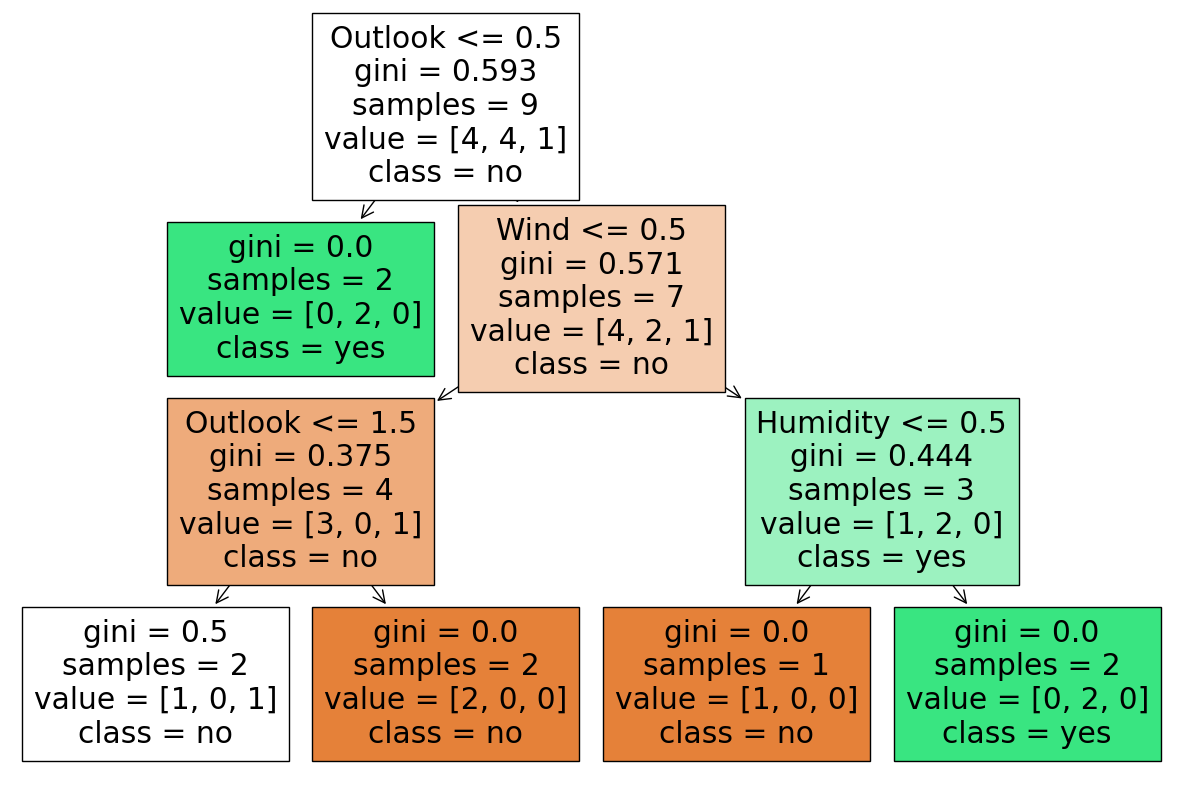

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plot_tree(des, feature_names=x.columns, class_names=["no", "yes"], filled=True)
plt.show()

In [8]:
y_pred = des.predict(x_test)

In [9]:
des.score(x_test,y_test)

0.7142857142857143

In [10]:
dict1 = {'Outlook':['sunny','overcast','rain' ,'sunny','rain','overcast'],'Temperature':['mild','hot','cool','hot','mild','mild'],'Humidity':['high','normal','normal','high','high','normal'],'Wind':['strong','weak','strong','weak','strong','weak']}
sample_dataset = ps.DataFrame(dict1,columns=['Outlook','Temperature','Humidity','Wind'])
sample_dataset['Outlook'] = enc.fit_transform(sample_dataset['Outlook'])
sample_dataset['Temperature'] = enc.fit_transform(sample_dataset['Temperature'])
sample_dataset['Humidity'] = enc.fit_transform(sample_dataset['Humidity'])
sample_dataset['Wind'] = enc.fit_transform(sample_dataset['Wind'])
sample_dataset.head(2)

,Outlook,Temperature,Humidity,Wind
0,2,2,0,0
1,0,1,1,1


In [11]:
y_sample_pred = des.predict(sample_dataset)
print("Predicted of Sample Data: ")
for i in y_sample_pred:
    if(i==0):
        print("no",end=" ")
    elif(i==1):
        print("yes",end=" ")    

Predicted of Sample Data: 
no yes no no no yes 

#### 2. Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to. It is a sample of binary classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient. Dataset name:drugdata.csv

In [12]:
df2 = ps.read_csv("drugdata.csv")
df2.head()

,Unnamed: 0,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0,23,F,HIGH,HIGH,25.355,drugY
1,1,47,M,LOW,HIGH,13.093,drugC
2,2,47,M,LOW,HIGH,10.114,drugC
3,3,28,F,NORMAL,HIGH,7.798,drugX
4,4,61,F,LOW,HIGH,18.043,drugY


In [13]:
df2.isnull().sum()

Unnamed: 0     0
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [14]:
df2 = df2.drop('Unnamed: 0',axis='columns')

In [15]:
df2['Sex'] = enc.fit_transform(df2['Sex'])
df2['BP'] = enc.fit_transform(df2['BP'])
df2['Cholesterol'] = enc.fit_transform(df2['Cholesterol'])
df2['Drug'] = enc.fit_transform(df2['Drug'])

df2.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [16]:
x1 = df2.drop('Drug',axis='columns')
y1 = df2.Drug

In [17]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.4,random_state=1)

In [18]:
des1 = DecisionTreeClassifier()
des1.fit(x1_train,y1_train)

DecisionTreeClassifier()

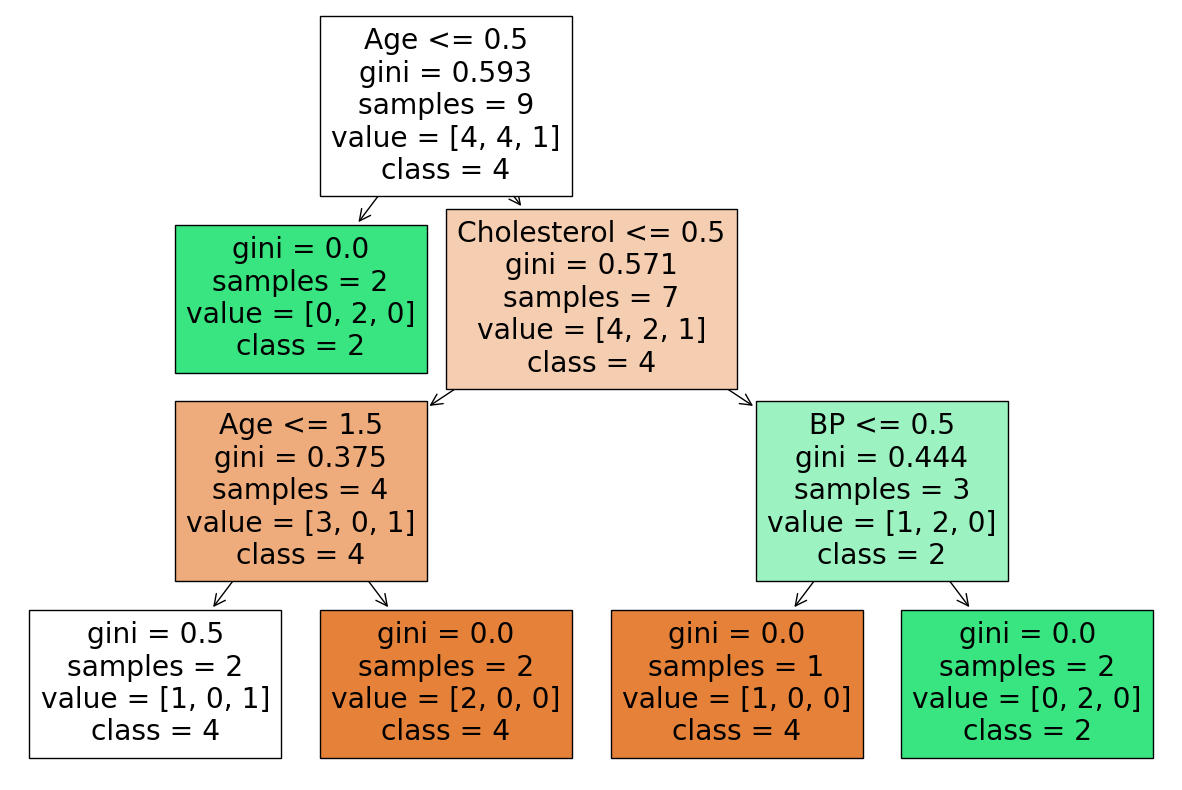

In [22]:
plt.figure(figsize=(15, 10))
plot_tree(des, feature_names=x1.columns, class_names=df2['Drug'].unique().astype(str), filled=True)
plt.show()

In [19]:
y1_pred=des1.predict(x1_test)
print("Test Predicted Values: ")
for i in y1_pred:
    if(i==0):
        print('drugA',end=" ")
    if(i==1):
        print('drugB',end=" ")
    if(i==2):
        print('drugC',end=" ")
    if(i==3):
        print('drugX',end=" ")
    if(i==4):
        print('drugY',end=" ")                

Test Predicted Values: 
drugX drugY drugX drugC drugY drugX drugX drugY drugY drugY drugX drugC drugY drugY drugA drugA drugX drugX drugB drugY drugX drugX drugX drugY drugB drugX drugX drugY drugC drugX drugC drugY drugY drugY drugA drugY drugA drugY drugY drugY drugB drugY drugY drugX drugB drugY drugX drugX drugY drugA drugY drugY drugY drugY drugY drugY drugX drugX drugX drugA drugX drugX drugA drugY drugA drugX drugX drugX drugY drugA drugB drugC drugY drugC drugY drugX drugY drugX drugY drugY 

In [20]:
des1.score(x1_test,y1_test)

0.975